# Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score

# import pickle
# import pydotplus
# from sklearn import tree
# from IPython.display import Image
# from sklearn.tree import export_graphviz
# from sklearn.externals.six import StringIO

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Load data

In [2]:
train_data = pd.read_csv("../data/train.csv")
test_data = pd.read_csv("../data/test.csv")

## Rename Columns

In [3]:
train_data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
train_data.rename(columns = {'battery_power':'battery_size',
                       'blue':'bluetooth_capable',
                       'clock_speed':'cpu_speed',
                       'dual_sim':'dual_sim_capable',
                       'fc':'front_camera_megapixels',
                       'four_g':'4G_capable',
                       'int_memory':'storage_space',
                       'm_dep':'phone_depth',
                       'mobile_wt':'phone_width',
                       'n_cores':'cpu_cores',
                       'pc':'rear_camera_megapixels',
                       'px_height':'screen_height_pixels',
                       'px_width':'screen_width_pixels',
                       'ram':'ram',
                       'sc_h':'screen_height_cm',
                       'sc_w':'screen_width_cm',
                       'talk_time':'talk_time_hours',
                       'three_g':'3G_capable',
                       'touch_screen':'touch_screen',
                       'wifi':'wifi_capable',
                       'price_range':'price'},
            inplace = True)

In [5]:
train_data.columns

Index(['battery_size', 'bluetooth_capable', 'cpu_speed', 'dual_sim_capable',
       'front_camera_megapixels', '4G_capable', 'storage_space', 'phone_depth',
       'phone_width', 'cpu_cores', 'rear_camera_megapixels',
       'screen_height_pixels', 'screen_width_pixels', 'ram',
       'screen_height_cm', 'screen_width_cm', 'talk_time_hours', '3G_capable',
       'touch_screen', 'wifi_capable', 'price'],
      dtype='object')

In [6]:
test_data.columns = train_data.columns

In [7]:
test_data.columns

Index(['battery_size', 'bluetooth_capable', 'cpu_speed', 'dual_sim_capable',
       'front_camera_megapixels', '4G_capable', 'storage_space', 'phone_depth',
       'phone_width', 'cpu_cores', 'rear_camera_megapixels',
       'screen_height_pixels', 'screen_width_pixels', 'ram',
       'screen_height_cm', 'screen_width_cm', 'talk_time_hours', '3G_capable',
       'touch_screen', 'wifi_capable', 'price'],
      dtype='object')

# Inspect data

In [8]:
train_data.head()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_width,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
test_data.head()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_width,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
0,1,1043,1,1.8,1,14,0,5,0.1,193,...,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,...,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,...,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,...,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,...,18,749,810,1773,15,8,7,1,0,1


In [10]:
train_data.shape

(2000, 21)

In [11]:
test_data.shape

(1000, 21)

In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_size               2000 non-null int64
bluetooth_capable          2000 non-null int64
cpu_speed                  2000 non-null float64
dual_sim_capable           2000 non-null int64
front_camera_megapixels    2000 non-null int64
4G_capable                 2000 non-null int64
storage_space              2000 non-null int64
phone_depth                2000 non-null float64
phone_width                2000 non-null int64
cpu_cores                  2000 non-null int64
rear_camera_megapixels     2000 non-null int64
screen_height_pixels       2000 non-null int64
screen_width_pixels        2000 non-null int64
ram                        2000 non-null int64
screen_height_cm           2000 non-null int64
screen_width_cm            2000 non-null int64
talk_time_hours            2000 non-null int64
3G_capable                 2000 non-null int64
touch_screen               2000 non-null in

In [13]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
battery_size               1000 non-null int64
bluetooth_capable          1000 non-null int64
cpu_speed                  1000 non-null int64
dual_sim_capable           1000 non-null float64
front_camera_megapixels    1000 non-null int64
4G_capable                 1000 non-null int64
storage_space              1000 non-null int64
phone_depth                1000 non-null int64
phone_width                1000 non-null float64
cpu_cores                  1000 non-null int64
rear_camera_megapixels     1000 non-null int64
screen_height_pixels       1000 non-null int64
screen_width_pixels        1000 non-null int64
ram                        1000 non-null int64
screen_height_cm           1000 non-null int64
screen_width_cm            1000 non-null int64
talk_time_hours            1000 non-null int64
3G_capable                 1000 non-null int64
touch_screen               1000 non-null int

In [14]:
train_data.describe()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_width,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [15]:
test_data.describe()

,battery_size,bluetooth_capable,cpu_speed,dual_sim_capable,front_camera_megapixels,4G_capable,storage_space,phone_depth,phone_width,cpu_cores,...,screen_height_pixels,screen_width_pixels,ram,screen_height_cm,screen_width_cm,talk_time_hours,3G_capable,touch_screen,wifi_capable,price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000
mean,500.500000,1248.510000,0.516000,1.540900,0.517000,4.593000,0.487000,33.652000,0.517500,139.51100,...,10.054000,627.121000,1239.774000,2138.998000,11.995000,5.316000,11.085000,0.756000,0.50000,0.507000
std,288.819436,432.458227,0.499994,0.829268,0.499961,4.463325,0.500081,18.128694,0.280861,34.85155,...,6.095099,432.929699,439.670981,1088.092278,4.320607,4.240062,5.497636,0.429708,0.50025,0.500201
min,1.000000,500.000000,0.000000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.00000,...,0.000000,0.000000,501.000000,263.000000,5.000000,0.000000,2.000000,0.000000,0.00000,0.000000
25%,250.750000,895.000000,0.000000,0.700000,0.000000,1.000000,0.000000,18.000000,0.300000,109.75000,...,5.000000,263.750000,831.750000,1237.250000,8.000000,2.000000,6.750000,1.000000,0.00000,0.000000
50%,500.500000,1246.500000,1.000000,1.500000,1.000000,3.000000,0.000000,34.500000,0.500000,139.00000,...,10.000000,564.500000,1250.000000,2153.500000,12.000000,5.000000,11.000000,1.000000,0.50000,1.000000
75%,750.250000,1629.250000,1.000000,2.300000,1.000000,7.000000,1.000000,49.000000,0.800000,170.00000,...,16.000000,903.000000,1637.750000,3065.500000,16.000000,8.000000,16.000000,1.000000,1.00000,1.000000
max,1000.000000,1999.000000,1.000000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.00000,...,20.000000,1907.000000,1998.000000,3989.000000,19.000000,18.000000,20.000000,1.000000,1.00000,1.000000


## No blank/null/nan values to manage

## No data types to change to become usable

## Look into each column's data

In [16]:
# There a few columns with data as 0 or 1
# I'm assuming 0 is False and 1 is True

for col in train_data.columns:
    print(train_data[col].value_counts())
    print()

1589    6
618     6
1872    6
1379    5
1310    5
       ..
1072    1
1073    1
1074    1
1075    1
1998    1
Name: battery_size, Length: 1094, dtype: int64

0    1010
1     990
Name: bluetooth_capable, dtype: int64

0.5    413
2.8     85
2.3     78
1.6     76
2.1     76
2.5     74
0.6     74
1.4     70
1.3     68
2.0     67
1.5     67
1.9     65
0.7     64
1.8     62
2.9     62
1.0     61
1.7     60
2.2     59
0.8     58
2.4     58
0.9     58
1.2     56
2.7     55
2.6     55
1.1     51
3.0     28
Name: cpu_speed, dtype: int64

1    1019
0     981
Name: dual_sim_capable, dtype: int64

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_camera_megapixels, dtype: int64

1    1043
0     957
Name: 4G_capable, dtype: int64

27    47
14    45
16    45
2     42
57    42
      ..
25    24
38    23
62    21
4     20
59    18
Name: storag

## Visuals of each column's data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fda51102dd0>,
      dtype=object)

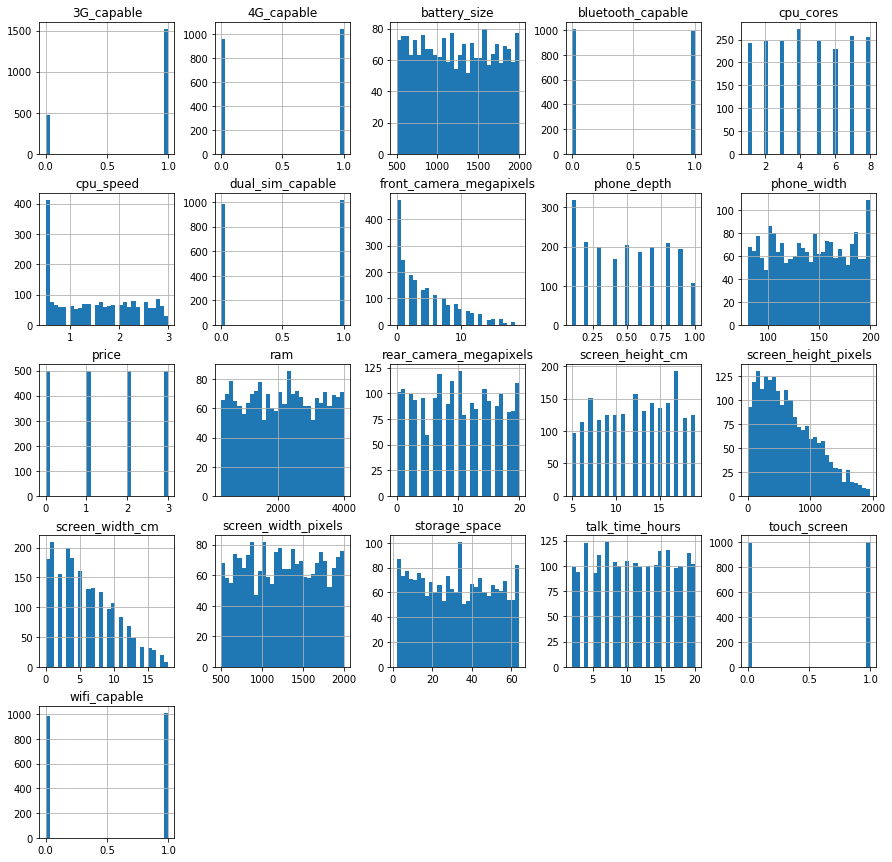

In [17]:
train_data.hist(bins=30, figsize=(15, 15))

## Feature correlations

AxesSubplot(0.125,0.125;0.62x0.755)


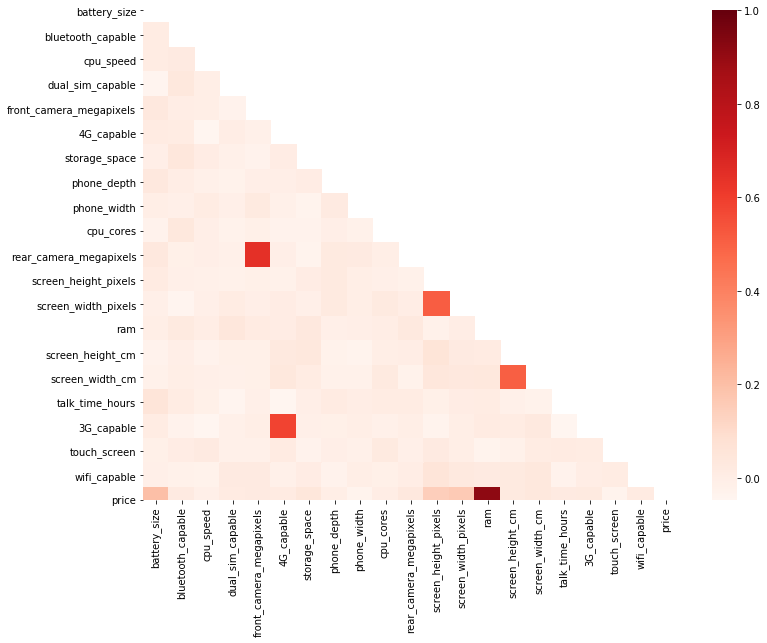

In [18]:
correlations = train_data.corr()
f, ax = plt.subplots(figsize = (12, 9))
mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_one = sns.heatmap(correlations, cmap = 'Reds', mask = mask)
print(heatmap_one)

AxesSubplot(0.125,0.125;0.62x0.755)


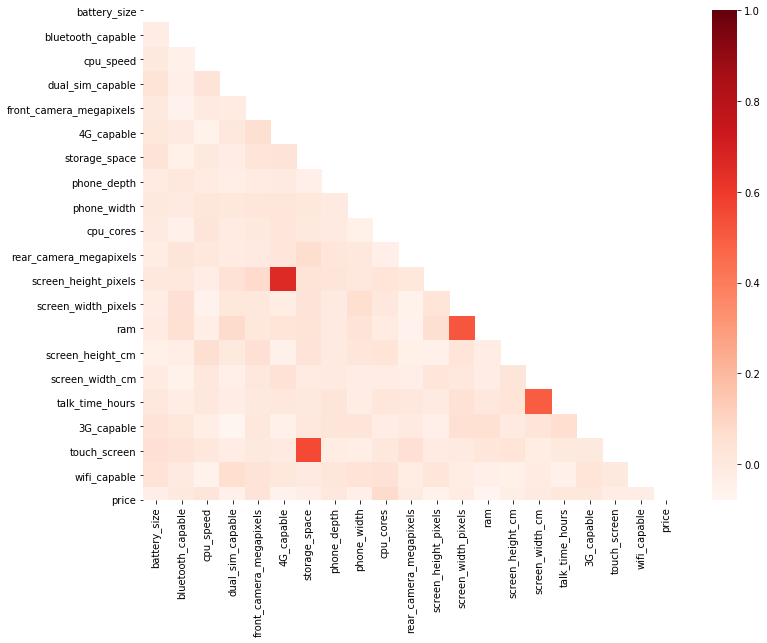

In [19]:
correlations = test_data.corr()
f, ax = plt.subplots(figsize = (12, 9))

mask = np.zeros_like(correlations, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

heatmap_two = sns.heatmap(correlations, cmap = 'Reds', mask = mask)
print(heatmap_two)

In [20]:
corr = train_data.corr()

important_feature = corr['price'].sort_values(ascending=False).to_frame()
important_feature

,price
price,1.000000
ram,0.917046
battery_size,0.200723
screen_width_pixels,0.165818
screen_height_pixels,0.148858
storage_space,0.044435
screen_width_cm,0.038711
rear_camera_megapixels,0.033599
3G_capable,0.023611
screen_height_cm,0.022986


## Countplots of the 'price' column

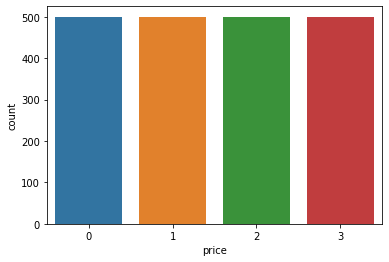

In [21]:
sns.countplot(data = train_data, x = 'price')

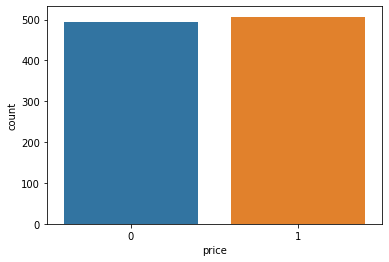

In [22]:
sns.countplot(data = test_data, x = 'price')

## Modeling

In [23]:
x = train_data.drop('price', axis=1)
y = train_data['price']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [27]:
# def print_metrics(y_test, y_pred):
#     print('Accuracy Score is:', accuracy_score(y_test, y_pred) * 100)
#     print()
#     print('Confusion matrix:')
#     print(confusion_matrix(y_test, y_pred))
#     print()
#     print('Classification report:')
#     print(classification_report(y_test, y_pred))

In [31]:
# Testing these models with default settings and printing out various metrics/results for each
# SVC, KNeighborsClassifier, LogisticRegression, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# Need to figure out settings for these 2: SVC(random_state = 42), KNeighborsClassifier(random_state = 42),

classifiers = [LogisticRegression(random_state = 42, solver = 'liblinear'),
               RandomForestClassifier(random_state = 42, n_estimators = 100),
               AdaBoostClassifier(random_state = 42),
               GradientBoostingClassifier(random_state = 42)]

for clfs in classifiers:
    clfs.fit(X_train, y_train)
    name = clfs.__class__.__name__
    y_pred = clfs.predict(X_test)
    print("=" * 60)
    print(name)
    print()
    print('Accuracy Score (scaled):', accuracy_score(y_test, y_pred) * 100)
    print()
    print('Confusion matrix (scaled):')
    print(confusion_matrix(y_test, y_pred))
    print()
    print('Classification report (scaled):')
    print(classification_report(y_test, y_pred))

LogisticRegression

Accuracy Score (scaled): 78.83333333333333

Confusion matrix (scaled):
[[143   7   1   0]
 [ 11  98  37   0]
 [  0  34  83  31]
 [  0   0   6 149]]

Classification report (scaled):
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       151
           1       0.71      0.67      0.69       146
           2       0.65      0.56      0.60       148
           3       0.83      0.96      0.89       155

    accuracy                           0.79       600
   macro avg       0.78      0.79      0.78       600
weighted avg       0.78      0.79      0.78       600

RandomForestClassifier

Accuracy Score (scaled): 86.66666666666667

Confusion matrix (scaled):
[[144   7   0   0]
 [ 10 119  17   0]
 [  0  20 116  12]
 [  0   0  14 141]]

Classification report (scaled):
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       151
           1       0.82      0.82      0.82       